In [23]:
# BSM Chooser Option Pricing and Python Function Usage Demonstration

## Import Necessary Libraries
#First, we need to import libraries required for numerical computation, statistical analysis, and visualization
#```python
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [24]:
S0 = 100  # Initial price of the underlying asset
K = 100   # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1    # Option expiration time (in years)
U = 0.5  # Time point to choose the option type (in years)
n_paths = 500  # Number of Monte Carlo simulation paths

In [25]:
def bs_price(S, K, r, sigma, tau, option_type='call'):
    """
    Calculate the Black-Scholes price of European options
    
    Parameters:
    S: Current price of the underlying asset
    K: Strike price
    r: Risk-free interest rate
    sigma: Volatility
    tau: Remaining time to maturity
    option_type: Type of option, 'call' for call option, 'put' for put option
    
    Returns:
    Calculated option price
    """
    # Calculate parameters d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    # Calculate price based on option type
    if option_type == 'call':
        price = S * si.norm.cdf(d1) - K * np.exp(-r * tau) * si.norm.cdf(d2)
    else:
        price = K * np.exp(-r * tau) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    return price

In [26]:
# Generate random numbers from a standard normal distribution
Z = np.random.randn(n_paths)

# Calculate the price of the underlying asset at the choice time U
S_U = S0 * np.exp((r - 0.5 * sigma**2) * U + sigma * np.sqrt(U) * Z)

# Calculate remaining time to maturity
tau = T - U

# Call the bs_price function to calculate call option values (demonstrating function parameter passing)
call_values = bs_price(S_U, K, r, sigma, tau, option_type='call')

# Call the bs_price function to calculate put option values (demonstrating usage of different parameters)
put_values = bs_price(S_U, K, r, sigma, tau, option_type='put')

# A Chooser option will select the more valuable option type at the choice time
chooser_payoff = np.maximum(call_values, put_values)

# Value discounted to the current time
discounted_payoff = np.exp(-r * U) * chooser_payoff

Monte Carlo Chooser Option Price Estimate: 13.4601
Rolling Average Estimate: 13.1685


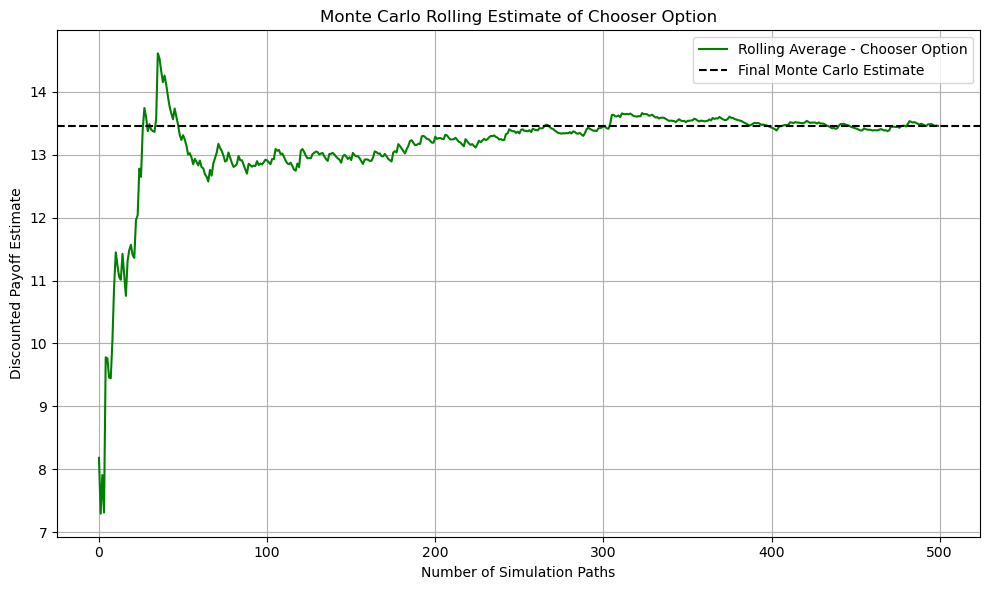

In [28]:
# Calculate Monte Carlo estimate
MC_estimate_chooser = discounted_payoff.mean()

# Calculate rolling average to demonstrate simulation convergence process
rolling_average_chooser = np.cumsum(discounted_payoff) / (np.arange(n_paths) + 1)

# Output results
print(f"Monte Carlo Chooser Option Price Estimate: {MC_estimate_chooser:.4f}")
print(f"Rolling Average Estimate: {rolling_average_chooser.mean():.4f}")

# Visualize the rolling average convergence process
plt.figure(figsize=(10, 6))
plt.plot(rolling_average_chooser, color='green', label='Rolling Average - Chooser Option')
plt.axhline(MC_estimate_chooser, color='black', linestyle='--', label='Final Monte Carlo Estimate')
plt.xlabel("Number of Simulation Paths")
plt.ylabel("Discounted Payoff Estimate")
plt.title("Monte Carlo Rolling Estimate of Chooser Option")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()